## Step 1: Data Exploration and Preparation

In this notebook, we'll start by loading the deepfake detection dataset from Hugging Face. We will explore its structure and visualize some examples to understand what we're working with.

### 1.1: Install and Import Libraries

First, let's make sure we have the necessary libraries installed. `datasets` is from Hugging Face and will help us download the data. `matplotlib` is for plotting images.

In [1]:
%pip install datasets matplotlib Pillow

   ---------------------------------------- 0.0/561.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/561.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/561.5 kB ? eta -:--:--
   ------------------ --------------------- 262.1/561.5 kB ? eta -:--:--
   -------------------------------------- 561.5/561.5 kB 862.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/26.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/26.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/26.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/26.1 MB ? eta -:--:--
    --------------------------------------- 0.5/26.1 MB 750.6 kB/s eta 0:00:35
    --------------------------------------- 0.5/26.1 MB 750.6 kB/s eta 0:00:35
   - -------------------------------------- 0.8/26.1 MB 783.1 kB/s eta 0:00:33
   - -------------------------------------- 0.8/26.1 MB 783.1 kB/s eta 0:00:33
   - ---------------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import random

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1.2: Load the Dataset

We'll load the `saakshigupta/deepfake-detection-dataset-v3` dataset. It's already split into `train` and `test` sets, which is convenient.

In [3]:
dataset = load_dataset("saakshigupta/deepfake-detection-dataset-v3")

print("Dataset loaded successfully!")
print(dataset)

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ASUS\.cache\huggingface\hub\datasets--saakshigupta--deepfake-detection-dataset-v3. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not i

Dataset loaded successfully!
DatasetDict({
    train: Dataset({
        features: ['image', 'cam_image', 'cam_overlay', 'comparison_image', 'label', 'confidence_score', 'original_caption', 'cam_caption', 'query', 'technical_explanation', 'non_technical_explanation'],
        num_rows: 474
    })
    test: Dataset({
        features: ['image', 'cam_image', 'cam_overlay', 'comparison_image', 'label', 'confidence_score', 'original_caption', 'cam_caption', 'query', 'technical_explanation', 'non_technical_explanation'],
        num_rows: 53
    })
})


### 1.3: Explore the Dataset Structure

Let's look at a single example from the training set to understand the features.

Sample from the dataset:
{'cam_image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x2002151DE50>, 'cam_overlay': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x2002151E5D0>, 'comparison_image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1500x500 at 0x200214B7CE0>, 'label': 0, 'confidence_score': 0.9100000262260437, 'original_caption': 'there is a man sitting on a couch wearing a suit and tie', 'cam_caption': 'High activation concentrated around both eye regions and on the right side of the mouth, forming three distinct hotspots. Moderate activation extends across the forehead, upper cheeks, and chin area with variable intensity. Low activation present in nasal bridge, left cheek, and peripheral face boundaries. Activation pattern displays partial asymmetry with stronger response on the right side and a vertical gradient diminishing from central to peripheral regions.', 'query': 'How do detection systems handle different types of image 

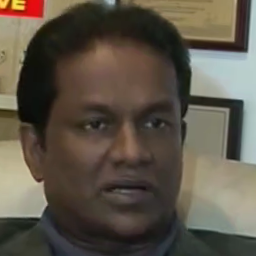

In [4]:
train_dataset = dataset['train']
sample = train_dataset[0]

print("Sample from the dataset:")
print({k: v for k, v in sample.items() if k != 'image'}) # Print all except the image data itself
sample['image']

### 1.4: Visualize Real vs. Fake Images

Visualizing the data is a key step. Let's find one real image and one fake image to display side-by-side. The `label` is 0 for fake and 1 for real.

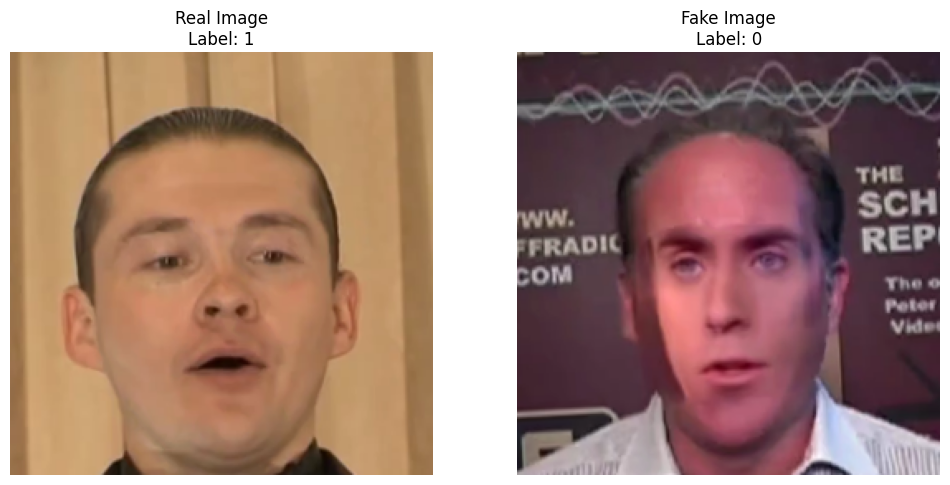

In [5]:
# Find one real and one fake image
real_images = [data for data in train_dataset if data['label'] == 1]
fake_images = [data for data in train_dataset if data['label'] == 0]

real_sample = random.choice(real_images)
fake_sample = random.choice(fake_images)

# Create a figure to display the images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(real_sample['image'])
ax[0].set_title(f"Real Image\nLabel: {real_sample['label']}")
ax[0].axis('off')

ax[1].imshow(fake_sample['image'])
ax[1].set_title(f"Fake Image\nLabel: {fake_sample['label']}")
ax[1].axis('off')

plt.show()

## Next Steps

Now that we have loaded and explored the data, the next step is to pre-process it and prepare it for training our CNN model. This will involve:

1.  **Resizing and Normalizing Images**: Ensuring all images are the same size and their pixel values are scaled appropriately.
2.  **Creating DataLoaders**: Setting up efficient pipelines to feed data to our model during training.

We will tackle this in the next notebook, `2_Model_Training.ipynb`.